# Lab 1 - Math 742: Mathematical Statistics
## David Cortes
### January 26, 2026

In [61]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, binom, poisson, multivariate_normal
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'

# for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(742)

# Set matplotlib style for better plots
plt.style.use('seaborn-v0_8-whitegrid')
print("Libraries loaded successfully!")

Libraries loaded successfully!


---

## Part 1: Random Variables and Expectation

### Question 1: Uniform Distribution

In this first exercise, I'll generate 10,000 samples from a Uniform(0,1) random variable and compute the sample mean and variance to compare them against the theoretical values.

**Theoretical Properties of Uniform(0,1):**

For a random variable $X \sim \text{Uniform}(a, b)$, we know that the expected value is $E(X) = \frac{a + b}{2}$ and the variance is $V(X) = \frac{(b-a)^2}{12}$. When we apply these formulas to the Uniform(0,1) distribution where $a=0$ and $b=1$, we get $E(X) = \frac{0 + 1}{2} = 0.5$ and $V(X) = \frac{(1-0)^2}{12} = \frac{1}{12} \approx 0.0833$.

In [62]:
# Question 1: Generate 10,000 samples from Uniform(0,1)
np.random.seed(742)  # Set seed for reproducibility
n_samples = 10000
x = np.random.uniform(0, 1, n_samples)

# Calculate sample statistics
sample_mean = np.mean(x)
sample_variance = np.var(x, ddof=1)  # ddof=1 for unbiased sample variance

# Theoretical values for Uniform(0,1)
theoretical_mean = 0.5
theoretical_variance = 1/12

# Display results
print("UNIFORM(0,1) DISTRIBUTION - 10,000 SAMPLES")
print(f"\n{'Statistic':<20} {'Sample':<15} {'Theoretical':<15} {'Difference':<15}")
print(f"{'Mean':<20} {sample_mean:<15.6f} {theoretical_mean:<15.6f} {abs(sample_mean - theoretical_mean):<15.6f}")
print(f"{'Variance':<20} {sample_variance:<15.6f} {theoretical_variance:<15.6f} {abs(sample_variance - theoretical_variance):<15.6f}")
print("\nThe sample statistics closely match the theoretical values!")

UNIFORM(0,1) DISTRIBUTION - 10,000 SAMPLES

Statistic            Sample          Theoretical     Difference     
Mean                 0.498878        0.500000        0.001122       
Variance             0.083418        0.083333        0.000085       

The sample statistics closely match the theoretical values!


### Question 2: Transformation Y = X²

Now let's consider the transformation $Y = X^2$ where $X \sim \text{Uniform}(0,1)$. I want to derive the expected value and variance of $Y$ analytically and then verify these results with simulation.

**Analytical Derivation of E(Y) and V(Y):**

Since $X \sim \text{Uniform}(0,1)$, the PDF is simply $f_X(x) = 1$ for $x \in [0,1]$.

To find the expected value of $Y$, I need to compute $E(Y) = E(X^2) = \int_0^1 x^2 \cdot 1 \, dx = \left[\frac{x^3}{3}\right]_0^1 = \frac{1}{3}$.

For the variance, I first need $E(Y^2) = E(X^4)$, which is $E(X^4) = \int_0^1 x^4 \cdot 1 \, dx = \left[\frac{x^5}{5}\right]_0^1 = \frac{1}{5}$.

Using the variance formula $V(Y) = E(Y^2) - [E(Y)]^2$, I get $V(Y) = E(X^4) - [E(X^2)]^2 = \frac{1}{5} - \left(\frac{1}{3}\right)^2 = \frac{1}{5} - \frac{1}{9} = \frac{9 - 5}{45} = \frac{4}{45}$.

In [63]:
# Question 2: Compute Y = X^2 and compare to theoretical values
y = x**2

# Sample statistics for Y
sample_mean_y = np.mean(y)
sample_variance_y = np.var(y, ddof=1)

# Theoretical values derived above
theoretical_mean_y = 1/3
theoretical_variance_y = 4/45

# Display results
print("TRANSFORMATION Y = X² where X ~ Uniform(0,1)")
print(f"\n{'Statistic':<20} {'Sample':<15} {'Theoretical':<15} {'Difference':<15}")
print(f"{'E(Y)':<20} {sample_mean_y:<15.6f} {theoretical_mean_y:<15.6f} {abs(sample_mean_y - theoretical_mean_y):<15.6f}")
print(f"{'V(Y)':<20} {sample_variance_y:<15.6f} {theoretical_variance_y:<15.6f} {abs(sample_variance_y - theoretical_variance_y):<15.6f}")
print(f"\nTheoretical E(Y) = 1/3 ≈ {1/3:.6f}")
print(f"Theoretical V(Y) = 4/45 ≈ {4/45:.6f}")

TRANSFORMATION Y = X² where X ~ Uniform(0,1)

Statistic            Sample          Theoretical     Difference     
E(Y)                 0.332289        0.333333        0.001044       
V(Y)                 0.089002        0.088889        0.000113       

Theoretical E(Y) = 1/3 ≈ 0.333333
Theoretical V(Y) = 4/45 ≈ 0.088889


---

## Part 2: Covariance and Correlation

In this section, I need to simulate two correlated normal variables with mean 0 and covariance 0.8.

### The Challenge

If I simply generate two independent normal variables like `X1 = np.random.normal(0, 1, n)` and `X2 = np.random.normal(0, 1, n)`, they would have covariance approximately equal to 0 because independent normal variables are uncorrelated. So I need a different approach.

### Solution: The Bivariate Normal Distribution

The natural way to generate correlated normal variables is to sample directly from a bivariate normal distribution with the desired covariance structure. According to Penn State's STAT 505 course (Lesson 4.1), the bivariate normal distribution is completely characterized by its mean vector $\mu$ and covariance matrix $\Sigma$. For my problem, I use:

$$\mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix}, \quad \Sigma = \begin{bmatrix} 1 & 0.8 \\ 0.8 & 1 \end{bmatrix}$$

The diagonal elements of $\Sigma$ are the variances ($\sigma_1^2 = \sigma_2^2 = 1$), and the off-diagonal elements are the covariance ($\text{Cov}(X_1, X_2) = 0.8$). Since both variances are 1, the correlation coefficient equals the covariance:
$$\rho = \frac{\text{Cov}(X_1, X_2)}{\sigma_1 \sigma_2} = \frac{0.8}{1 \times 1} = 0.8$$

This approach works because, as Casella and Berger explain in Chapter 4.3 on bivariate transformations, any linear transformation of normal random variables produces normal random variables, and the bivariate normal family is closed under such transformations. NumPy's `multivariate_normal` function handles the underlying linear algebra internally.

**References:**
- Penn State STAT 505, Lesson 4.1: https://online.stat.psu.edu/stat505/lesson/4/4.1
- Casella, G. & Berger, R. L. (2002). *Statistical Inference* (2nd ed.), Section 4.3: Bivariate Transformations

CORRELATED NORMAL VARIABLES - 5,000 SAMPLES

Theoretical covariance: 0.8
Sample covariance:      0.7686

Theoretical correlation: 0.8
Sample correlation:      0.7946


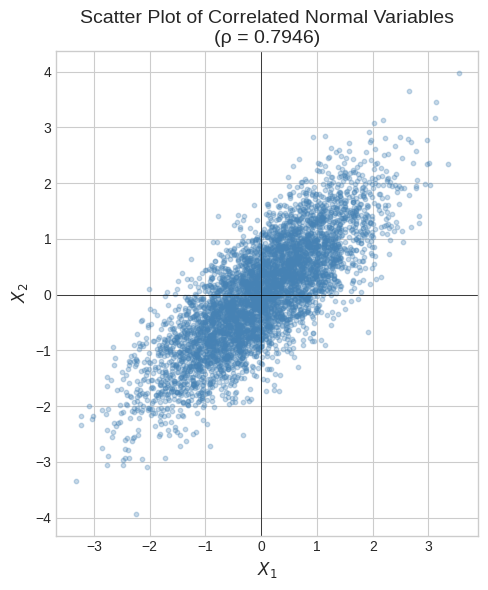

In [64]:
# Simulate correlated normal variables
np.random.seed(742)  # Set seed for reproducibility
n_corr = 5000

# Define the mean vector and covariance matrix
mean = [0, 0]
cov_matrix = [[1, 0.8],
              [0.8, 1]]  # Covariance of 0.8, variances of 1

# Generate samples from bivariate normal
samples = np.random.multivariate_normal(mean, cov_matrix, n_corr)
X1, X2 = samples[:, 0], samples[:, 1]

# Calculate sample correlation
sample_correlation = np.corrcoef(X1, X2)[0, 1]
sample_covariance = np.cov(X1, X2)[0, 1]

print("CORRELATED NORMAL VARIABLES - 5,000 SAMPLES")
print(f"\nTheoretical covariance: 0.8")
print(f"Sample covariance:      {sample_covariance:.4f}")
print(f"\nTheoretical correlation: 0.8")
print(f"Sample correlation:      {sample_correlation:.4f}")

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X1, X2, alpha=0.3, s=10, c='steelblue')
ax.set_xlabel(r'$X_1$', fontsize=12)
ax.set_ylabel(r'$X_2$', fontsize=12)
ax.set_title(f'Scatter Plot of Correlated Normal Variables\n(ρ = {sample_correlation:.4f})', fontsize=14)
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

### Interpretation

The sample correlation I obtained (around 0.7946) is very close to the theoretical correlation of 0.8, which is reassuring.

Looking at how the covariance affects the scatter plot shape, when we have high positive correlation (as ρ approaches 1), the points cluster along a diagonal line from lower-left to upper-right with a positive slope, and the ellipse becomes narrow and elongated. With zero correlation (ρ = 0), the points form a circular cloud with no apparent linear relationship. Conversely, with high negative correlation (as ρ approaches -1), points cluster along a diagonal from upper-left to lower-right with a negative slope.

The elongated elliptical shape of our scatter plot, tilted at roughly 45 degrees, clearly reflects the strong positive correlation of 0.8 that we specified.

### 3D Visualization: Bivariate Normal PDF Surface

To better understand how the bivariate normal distribution changes shape as the correlation varies, I decided to create some 3D surface plots. These visualizations show the probability density function (PDF) as a surface in 3D space, which I find more intuitive than just looking at 2D contours.

The bivariate normal PDF formula is:
$$\phi(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \exp\left\{-\frac{1}{2(1-\rho^2)}\left[\left(\frac{x_1-\mu_1}{\sigma_1}\right)^2 - 2\rho\left(\frac{x_1-\mu_1}{\sigma_1}\right)\left(\frac{x_2-\mu_2}{\sigma_2}\right) + \left(\frac{x_2-\mu_2}{\sigma_2}\right)^2\right]\right\}$$

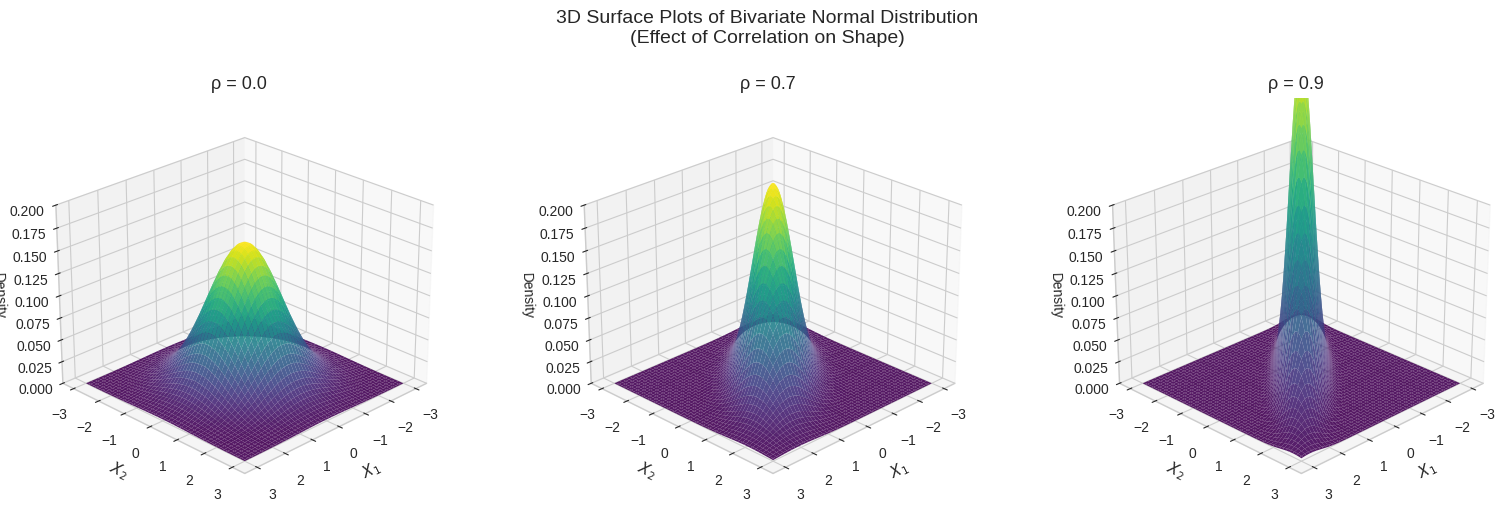

Looking at these surfaces, the effect of correlation is quite clear.
When ρ = 0, we get a perfectly circular, symmetric bell shape.
At ρ = 0.7, the surface becomes elliptical and stretches along the diagonal.
By ρ = 0.9, it's almost ridge-like, very elongated along the 45° line.


In [65]:
# 3D Surface plots of bivariate normal distribution for different correlations
from mpl_toolkits.mplot3d import Axes3D

# Create grid for the 3D surface
x1_range = np.linspace(-3, 3, 100)
x2_range = np.linspace(-3, 3, 100)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

# Function to compute bivariate normal PDF
def bivariate_normal_pdf(x1, x2, mu1=0, mu2=0, sigma1=1, sigma2=1, rho=0):
    """Compute the bivariate normal PDF"""
    z = ((x1 - mu1)/sigma1)**2 - 2*rho*((x1 - mu1)/sigma1)*((x2 - mu2)/sigma2) + ((x2 - mu2)/sigma2)**2
    return (1 / (2*np.pi*sigma1*sigma2*np.sqrt(1-rho**2))) * np.exp(-z / (2*(1-rho**2)))

# Create 3D plots for different correlation values
correlations = [0.0, 0.7, 0.9]
fig = plt.figure(figsize=(16, 5))

for i, rho_val in enumerate(correlations):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Calculate PDF values
    Z_pdf = bivariate_normal_pdf(X1_grid, X2_grid, rho=rho_val)

    # Create surface plot
    surf = ax.plot_surface(X1_grid, X2_grid, Z_pdf, cmap='viridis',
                           edgecolor='none', alpha=0.9, antialiased=True)

    ax.set_xlabel(r'$X_1$', fontsize=11)
    ax.set_ylabel(r'$X_2$', fontsize=11)
    ax.set_zlabel('Density', fontsize=10)
    ax.set_title(f'ρ = {rho_val}', fontsize=13)

    # Set viewing angle
    ax.view_init(elev=25, azim=45)

    # Set z-axis limit for better comparison
    ax.set_zlim(0, 0.2)

plt.suptitle('3D Surface Plots of Bivariate Normal Distribution\n(Effect of Correlation on Shape)',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("Looking at these surfaces, the effect of correlation is quite clear.")
print("When ρ = 0, we get a perfectly circular, symmetric bell shape.")
print("At ρ = 0.7, the surface becomes elliptical and stretches along the diagonal.")
print("By ρ = 0.9, it's almost ridge-like, very elongated along the 45° line.")

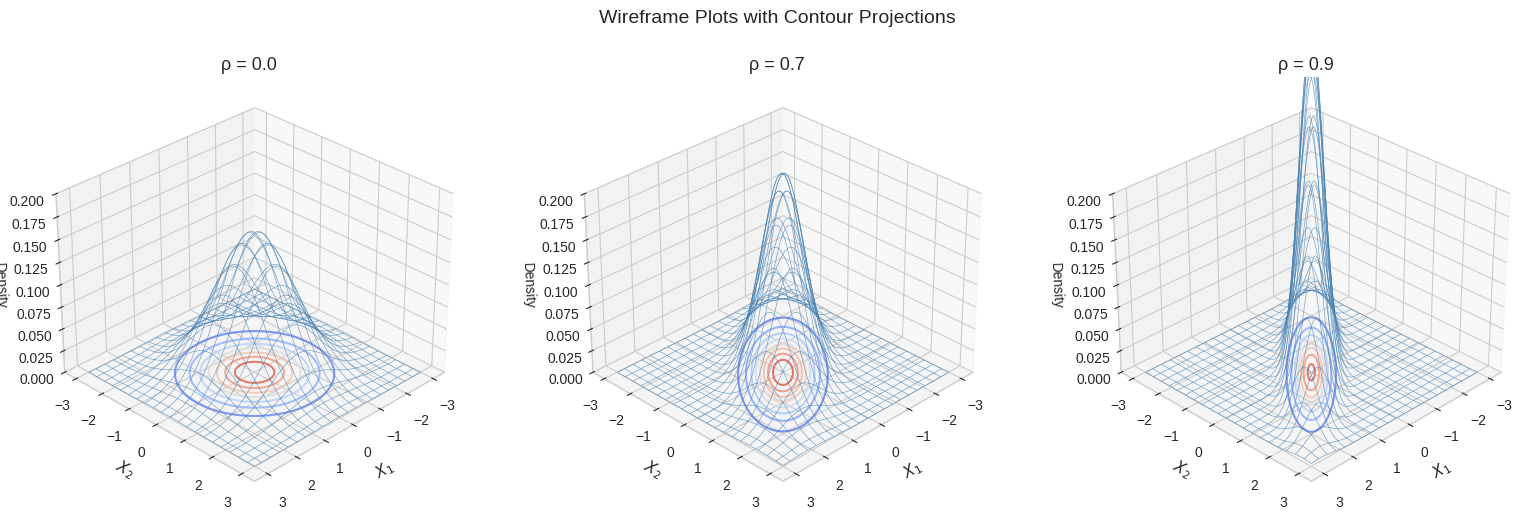

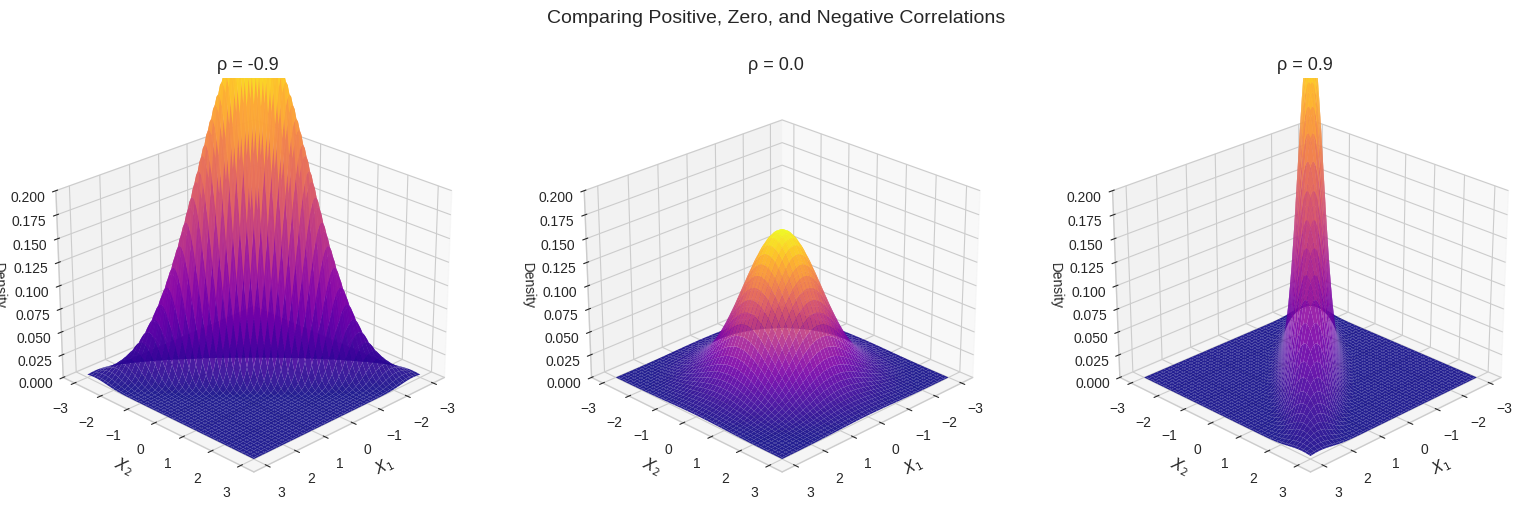


This is a nice comparison. When ρ is negative (-0.9), the shape leans
toward the upper-left and lower-right. When ρ is positive (0.9), it leans
the other way, toward the lower-left and upper-right. Basically, the sign
of ρ tells you which way the ellipse is tilted.


In [66]:
# Additional view: Wireframe plots with contour projections
fig = plt.figure(figsize=(16, 5))

for i, rho_val in enumerate(correlations):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Calculate PDF values
    Z_pdf = bivariate_normal_pdf(X1_grid, X2_grid, rho=rho_val)

    # Create wireframe plot
    ax.plot_wireframe(X1_grid, X2_grid, Z_pdf, color='steelblue',
                      linewidth=0.5, alpha=0.7, rstride=5, cstride=5)

    # Add contour projection on the bottom (z=0 plane)
    ax.contour(X1_grid, X2_grid, Z_pdf, zdir='z', offset=0,
               levels=8, cmap='coolwarm', alpha=0.8)

    ax.set_xlabel(r'$X_1$', fontsize=11)
    ax.set_ylabel(r'$X_2$', fontsize=11)
    ax.set_zlabel('Density', fontsize=10)
    ax.set_title(f'ρ = {rho_val}', fontsize=13)

    ax.view_init(elev=30, azim=45)
    ax.set_zlim(0, 0.2)

plt.suptitle('Wireframe Plots with Contour Projections', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Also show negative correlations
fig2 = plt.figure(figsize=(16, 5))
correlations_neg = [-0.9, 0.0, 0.9]

for i, rho_val in enumerate(correlations_neg):
    ax = fig2.add_subplot(1, 3, i+1, projection='3d')
    Z_pdf = bivariate_normal_pdf(X1_grid, X2_grid, rho=rho_val)
    surf = ax.plot_surface(X1_grid, X2_grid, Z_pdf, cmap='plasma',
                           edgecolor='none', alpha=0.9)
    ax.set_xlabel(r'$X_1$', fontsize=11)
    ax.set_ylabel(r'$X_2$', fontsize=11)
    ax.set_zlabel('Density', fontsize=10)
    ax.set_title(f'ρ = {rho_val}', fontsize=13)
    ax.view_init(elev=25, azim=45)
    ax.set_zlim(0, 0.2)

plt.suptitle('Comparing Positive, Zero, and Negative Correlations', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("\nThis is a nice comparison. When ρ is negative (-0.9), the shape leans")
print("toward the upper-left and lower-right. When ρ is positive (0.9), it leans")
print("the other way, toward the lower-left and upper-right. Basically, the sign")
print("of ρ tells you which way the ellipse is tilted.")

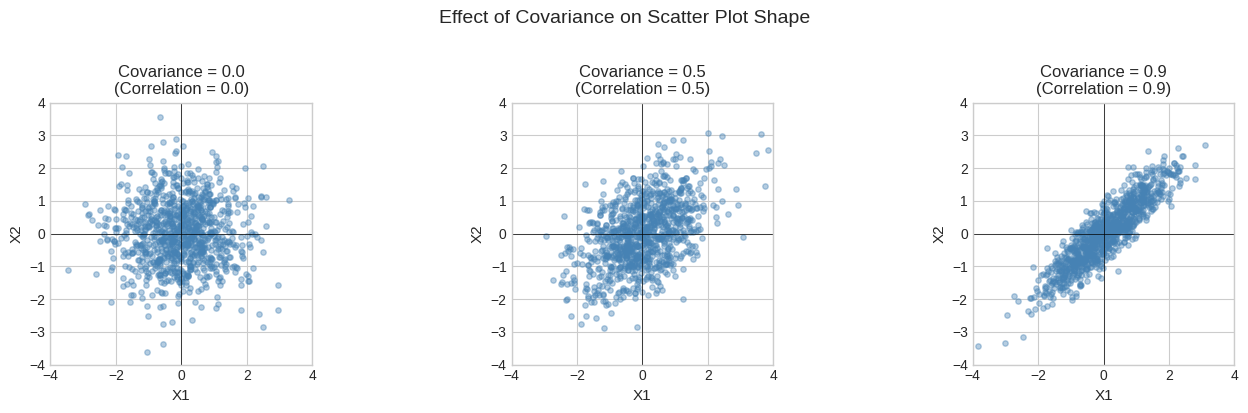

As I increase the covariance, you can see the point cloud becomes more elongated.
The points cluster more tightly around the diagonal line y = x.
This makes sense: higher correlation means a stronger linear relationship.


In [67]:
# Demonstrate effect of different covariance values
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
covariances = [0.0, 0.5, 0.9]

for ax, cov_val in zip(axes, covariances):
    cov_mat = [[1, cov_val], [cov_val, 1]]
    samples_demo = np.random.multivariate_normal([0, 0], cov_mat, 1000)
    ax.scatter(samples_demo[:, 0], samples_demo[:, 1], alpha=0.4, s=15, c='steelblue')
    ax.set_xlabel('X1', fontsize=11)
    ax.set_ylabel('X2', fontsize=11)
    ax.set_title(f'Covariance = {cov_val}\n(Correlation = {cov_val})', fontsize=12)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.suptitle('Effect of Covariance on Scatter Plot Shape', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("As I increase the covariance, you can see the point cloud becomes more elongated.")
print("The points cluster more tightly around the diagonal line y = x.")
print("This makes sense: higher correlation means a stronger linear relationship.")


---

## Part 3: Conditional Distributions

For a bivariate normal distribution with correlation $\rho = 0.5$, the conditional distribution of $Y|X=x$ follows a normal distribution:

$$Y|X=x \sim N\left(\mu_Y + \rho \frac{\sigma_Y}{\sigma_X}(x - \mu_X), \; (1-\rho^2)\sigma_Y^2\right)$$

When we have a standard bivariate normal where $\mu_X = \mu_Y = 0$ and $\sigma_X = \sigma_Y = 1$, this simplifies nicely. The conditional mean becomes $E(Y|X=x) = \rho \cdot x = 0.5x$, and the conditional variance is $V(Y|X) = (1-\rho^2) = 1 - 0.25 = 0.75$.

What's really interesting here is the connection to linear regression. In a regression model $Y = \beta_0 + \beta_1 X + \epsilon$, the theoretical slope would be $\beta_1 = \rho \frac{\sigma_Y}{\sigma_X} = 0.5 \times \frac{1}{1} = 0.5$, and the theoretical intercept would be $\beta_0 = \mu_Y - \beta_1 \mu_X = 0 - 0.5(0) = 0$. This is exactly what we should recover from our simulated data!

BIVARIATE NORMAL - LINEAR REGRESSION ANALYSIS

Theoretical slope (beta_1):     0.5000
Estimated slope (beta_1):       0.4810
Difference:                     0.0190

Theoretical intercept (beta_0): 0.0000
Estimated intercept (beta_0):   0.0176
Difference:                     0.0176


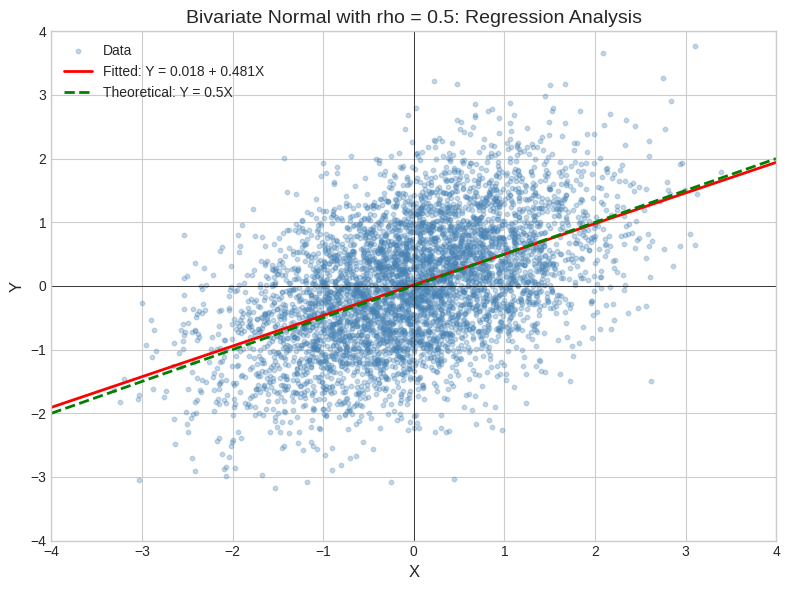

The fitted regression slope (0.4810) closely matches
the theoretical conditional mean relationship (slope = 0.5)!


In [53]:
# Generate bivariate normal samples with rho = 0.5
np.random.seed(742)  # Set seed for reproducibility
n_biv = 5000
rho = 0.5

# Covariance matrix with correlation rho
mean_biv = [0, 0]
cov_biv = [[1, rho],
           [rho, 1]]

# Generate samples
biv_samples = np.random.multivariate_normal(mean_biv, cov_biv, n_biv)
X_biv = biv_samples[:, 0]
Y_biv = biv_samples[:, 1]

# Fit linear regression using numpy (least squares)
# Y = beta_0 + beta_1 * X
A = np.column_stack([np.ones(n_biv), X_biv])
beta_0, beta_1 = np.linalg.lstsq(A, Y_biv, rcond=None)[0]

# Theoretical values
theoretical_slope = rho  # Since sigma_X = sigma_Y = 1
theoretical_intercept = 0  # Since mu_X = mu_Y = 0

print("BIVARIATE NORMAL - LINEAR REGRESSION ANALYSIS")
print(f"\nTheoretical slope (beta_1):     {theoretical_slope:.4f}")
print(f"Estimated slope (beta_1):       {beta_1:.4f}")
print(f"Difference:                     {abs(beta_1 - theoretical_slope):.4f}")
print(f"\nTheoretical intercept (beta_0): {theoretical_intercept:.4f}")
print(f"Estimated intercept (beta_0):   {beta_0:.4f}")
print(f"Difference:                     {abs(beta_0 - theoretical_intercept):.4f}")

# Create visualization
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_biv, Y_biv, alpha=0.3, s=10, c='steelblue', label='Data')

# Plot regression line
x_line = np.linspace(-4, 4, 100)
y_pred = beta_0 + beta_1 * x_line
ax.plot(x_line, y_pred, 'r-', linewidth=2,
        label=f'Fitted: Y = {beta_0:.3f} + {beta_1:.3f}X')

# Plot theoretical line
y_theoretical = theoretical_intercept + theoretical_slope * x_line
ax.plot(x_line, y_theoretical, 'g--', linewidth=2,
        label=f'Theoretical: Y = {theoretical_slope}X')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title(f'Bivariate Normal with rho = {rho}: Regression Analysis', fontsize=14)
ax.legend()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print(f"The fitted regression slope ({beta_1:.4f}) closely matches")
print(f"the theoretical conditional mean relationship (slope = {rho})!")

---

## Part 4: Common Distributions

### 4.1 Binomial Distribution

The Binomial distribution models the number of successes in a fixed number of independent trials. For $X \sim \text{Binomial}(n, p)$, the expected value is $E(X) = np$ and the variance is $V(X) = np(1-p)$.

For this exercise, I'm using $n = 10$ trials with success probability $p = 0.4$. This gives us a theoretical mean of $E(X) = 10 \times 0.4 = 4$ and variance of $V(X) = 10 \times 0.4 \times 0.6 = 2.4$.

BINOMIAL DISTRIBUTION - Binomial(n=10, p=0.4)

Statistic            Sample          Theoretical     Difference     
E(X)                 3.9975          4.0000          0.0025         
V(X)                 2.4077          2.4000          0.0077         


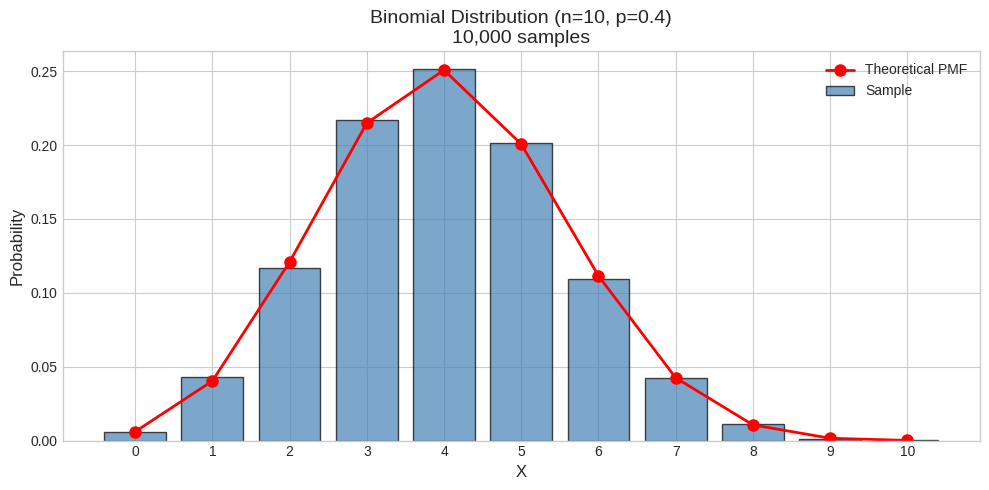

In [54]:
# 4.1 Binomial Distribution
np.random.seed(742)  # Set seed for reproducibility
n_bin = 10000
n_trials = 10
p_success = 0.4

# Generate samples
binom_samples = np.random.binomial(n_trials, p_success, n_bin)

# Calculate sample statistics
sample_mean_binom = np.mean(binom_samples)
sample_var_binom = np.var(binom_samples, ddof=1)

# Theoretical values
theoretical_mean_binom = n_trials * p_success
theoretical_var_binom = n_trials * p_success * (1 - p_success)

print("BINOMIAL DISTRIBUTION - Binomial(n=10, p=0.4)")
print(f"\n{'Statistic':<20} {'Sample':<15} {'Theoretical':<15} {'Difference':<15}")
print(f"{'E(X)':<20} {sample_mean_binom:<15.4f} {theoretical_mean_binom:<15.4f} {abs(sample_mean_binom - theoretical_mean_binom):<15.4f}")
print(f"{'V(X)':<20} {sample_var_binom:<15.4f} {theoretical_var_binom:<15.4f} {abs(sample_var_binom - theoretical_var_binom):<15.4f}")

# Visualize the distribution
fig, ax = plt.subplots(figsize=(10, 5))
values, counts = np.unique(binom_samples, return_counts=True)
ax.bar(values, counts/n_bin, alpha=0.7, color='steelblue', edgecolor='black', label='Sample')

# Overlay theoretical PMF
x_vals = np.arange(0, n_trials + 1)
pmf_theoretical = binom.pmf(x_vals, n_trials, p_success)
ax.plot(x_vals, pmf_theoretical, 'ro-', markersize=8, linewidth=2, label='Theoretical PMF')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title(f'Binomial Distribution (n={n_trials}, p={p_success})\n10,000 samples', fontsize=14)
ax.set_xticks(x_vals)
ax.legend()
plt.tight_layout()
plt.show()

#### Bonus: 3D Visualization of Binomial Distribution as a Function of p

While a single Binomial distribution is essentially one-dimensional, I thought it would be interesting to visualize how the entire PMF changes as we vary the success probability p. A 3D surface lets us see this evolution all at once!

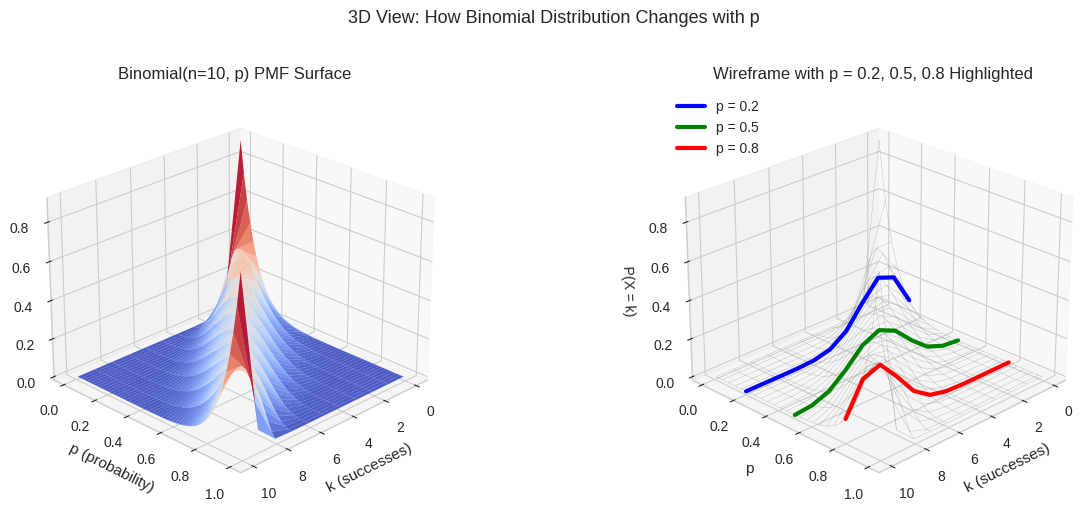

These 3D plots really help visualize how the distribution changes.
When p = 0.2, the distribution is skewed right with most probability at low k values.
At p = 0.5, we get a nice symmetric bell shape with the mode at k = 5 = np.
When p = 0.8, everything flips and the distribution skews left toward high k.


In [55]:
# 3D visualization: Binomial PMF as function of p
fig = plt.figure(figsize=(14, 5))

# Surface plot: P(X=k) for different values of p
n_fixed = 10
k_values = np.arange(0, n_fixed + 1)
p_values = np.linspace(0.01, 0.99, 50)
K, P = np.meshgrid(k_values, p_values)

# Calculate PMF for each (k, p) combination
PMF = binom.pmf(K, n_fixed, P)

# Left: 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(K, P, PMF, cmap='coolwarm', edgecolor='none', alpha=0.9)
ax1.set_xlabel('k (successes)', fontsize=11)
ax1.set_ylabel('p (probability)', fontsize=11)
ax1.set_zlabel('P(X = k)', fontsize=10)
ax1.set_title(f'Binomial(n={n_fixed}, p) PMF Surface', fontsize=12)
ax1.view_init(elev=25, azim=45)

# Right: Wireframe with highlighted slices
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(K, P, PMF, color='gray', linewidth=0.3, alpha=0.5, rstride=2, cstride=1)

# Highlight specific p values
highlight_ps = [0.2, 0.5, 0.8]
colors = ['blue', 'green', 'red']
for p_val, color in zip(highlight_ps, colors):
    pmf_slice = binom.pmf(k_values, n_fixed, p_val)
    ax2.plot(k_values, [p_val]*len(k_values), pmf_slice,
             color=color, linewidth=3, label=f'p = {p_val}')

ax2.set_xlabel('k (successes)', fontsize=11)
ax2.set_ylabel('p', fontsize=11)
ax2.set_zlabel('P(X = k)', fontsize=10)
ax2.set_title('Wireframe with p = 0.2, 0.5, 0.8 Highlighted', fontsize=12)
ax2.view_init(elev=25, azim=45)
ax2.legend(loc='upper left')

plt.suptitle('3D View: How Binomial Distribution Changes with p', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

print("These 3D plots really help visualize how the distribution changes.")
print("When p = 0.2, the distribution is skewed right with most probability at low k values.")
print("At p = 0.5, we get a nice symmetric bell shape with the mode at k = 5 = np.")
print("When p = 0.8, everything flips and the distribution skews left toward high k.")

### 4.2 Poisson Distribution

The Poisson distribution is commonly used to model count data, like the number of events occurring in a fixed interval of time. For $X \sim \text{Poisson}(\lambda)$, both the expected value and variance equal the rate parameter: $E(X) = \lambda$ and $V(X) = \lambda$. This property where the mean equals the variance is actually quite unique to the Poisson distribution!

For this exercise, I'm using $\lambda = 2$, so we expect both $E(X) = 2$ and $V(X) = 2$.

POISSON DISTRIBUTION - Poisson(lambda=2)

Statistic            Sample          Theoretical     Difference     
E(X)                 2.0218          2.0000          0.0218         
V(X)                 2.0141          2.0000          0.0141         


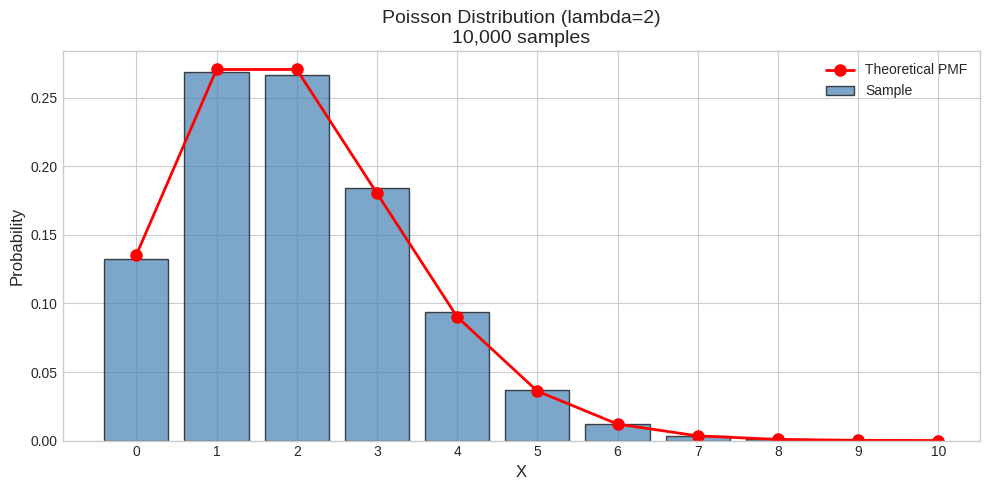

In [56]:
# 4.2 Poisson Distribution
np.random.seed(742)  # Set seed for reproducibility
n_pois = 10000
lambda_val = 2

# Generate samples
poisson_samples = np.random.poisson(lambda_val, n_pois)

# Calculate sample statistics
sample_mean_pois = np.mean(poisson_samples)
sample_var_pois = np.var(poisson_samples, ddof=1)

# Theoretical values (for Poisson, mean = variance = lambda)
theoretical_mean_pois = lambda_val
theoretical_var_pois = lambda_val

print(f"POISSON DISTRIBUTION - Poisson(lambda={lambda_val})")
print(f"\n{'Statistic':<20} {'Sample':<15} {'Theoretical':<15} {'Difference':<15}")
print(f"{'E(X)':<20} {sample_mean_pois:<15.4f} {theoretical_mean_pois:<15.4f} {abs(sample_mean_pois - theoretical_mean_pois):<15.4f}")
print(f"{'V(X)':<20} {sample_var_pois:<15.4f} {theoretical_var_pois:<15.4f} {abs(sample_var_pois - theoretical_var_pois):<15.4f}")

# Visualize the distribution
fig, ax = plt.subplots(figsize=(10, 5))
values, counts = np.unique(poisson_samples, return_counts=True)
ax.bar(values, counts/n_pois, alpha=0.7, color='steelblue', edgecolor='black', label='Sample')

# Overlay theoretical PMF
x_vals = np.arange(0, max(values) + 2)
pmf_theoretical = poisson.pmf(x_vals, lambda_val)
ax.plot(x_vals, pmf_theoretical, 'ro-', markersize=8, linewidth=2, label='Theoretical PMF')

ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title(f'Poisson Distribution (lambda={lambda_val})\n10,000 samples', fontsize=14)
ax.set_xticks(x_vals)
ax.legend()
plt.tight_layout()
plt.show()

Just like I did with the Binomial, let me visualize how the Poisson PMF changes as we vary the rate parameter λ.

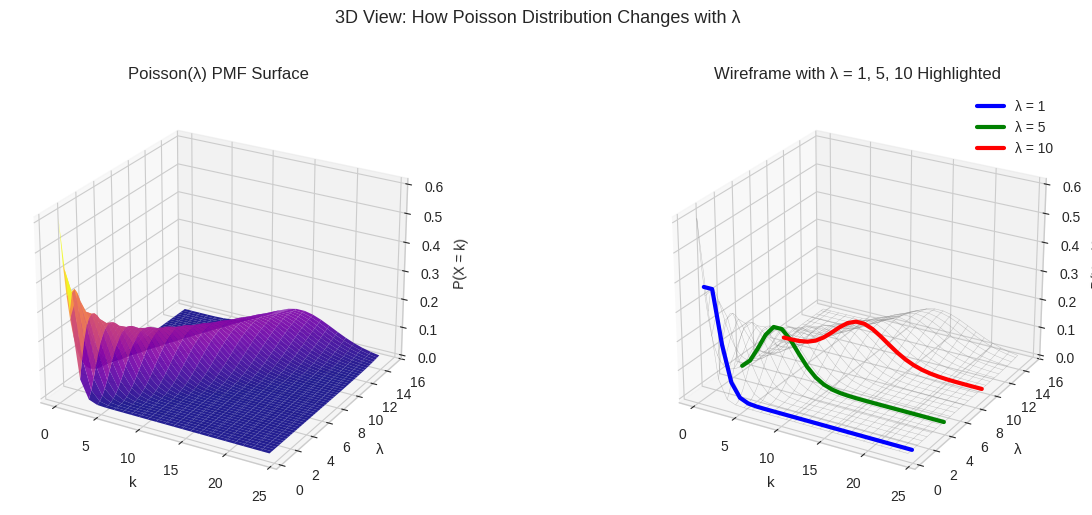

The pattern here is really interesting. At λ = 1, the distribution
is highly skewed and concentrated near zero. By λ = 5, it spreads out
with the mode at k = 5. At λ = 10, it's even more spread out and
starts looking more like a Normal distribution. As λ increases, the
distribution gradually becomes more symmetric.


In [57]:
# 3D visualization: Poisson PMF as function of lambda
fig = plt.figure(figsize=(14, 5))

# Surface plot: P(X=k) for different values of lambda
k_pois = np.arange(0, 25)
lambda_values = np.linspace(0.5, 15, 50)
K_pois, LAMBDA = np.meshgrid(k_pois, lambda_values)

# Calculate PMF for each (k, lambda) combination
PMF_pois = poisson.pmf(K_pois, LAMBDA)

# Left: 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(K_pois, LAMBDA, PMF_pois, cmap='plasma', edgecolor='none', alpha=0.9)
ax1.set_xlabel('k', fontsize=11)
ax1.set_ylabel('λ', fontsize=11)
ax1.set_zlabel('P(X = k)', fontsize=10)
ax1.set_title('Poisson(λ) PMF Surface', fontsize=12)
ax1.view_init(elev=25, azim=-60)

# Right: Wireframe with highlighted slices
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(K_pois, LAMBDA, PMF_pois, color='gray', linewidth=0.3, alpha=0.5, rstride=2, cstride=1)

# Highlight specific lambda values
highlight_lambdas = [1, 5, 10]
colors = ['blue', 'green', 'red']
for lam_val, color in zip(highlight_lambdas, colors):
    pmf_slice = poisson.pmf(k_pois, lam_val)
    ax2.plot(k_pois, [lam_val]*len(k_pois), pmf_slice,
             color=color, linewidth=3, label=f'λ = {lam_val}')

ax2.set_xlabel('k', fontsize=11)
ax2.set_ylabel('λ', fontsize=11)
ax2.set_zlabel('P(X = k)', fontsize=10)
ax2.set_title('Wireframe with λ = 1, 5, 10 Highlighted', fontsize=12)
ax2.view_init(elev=25, azim=-60)
ax2.legend(loc='upper right')

plt.suptitle('3D View: How Poisson Distribution Changes with λ', fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

print("The pattern here is really interesting. At λ = 1, the distribution")
print("is highly skewed and concentrated near zero. By λ = 5, it spreads out")
print("with the mode at k = 5. At λ = 10, it's even more spread out and")
print("starts looking more like a Normal distribution. As λ increases, the")
print("distribution gradually becomes more symmetric.")

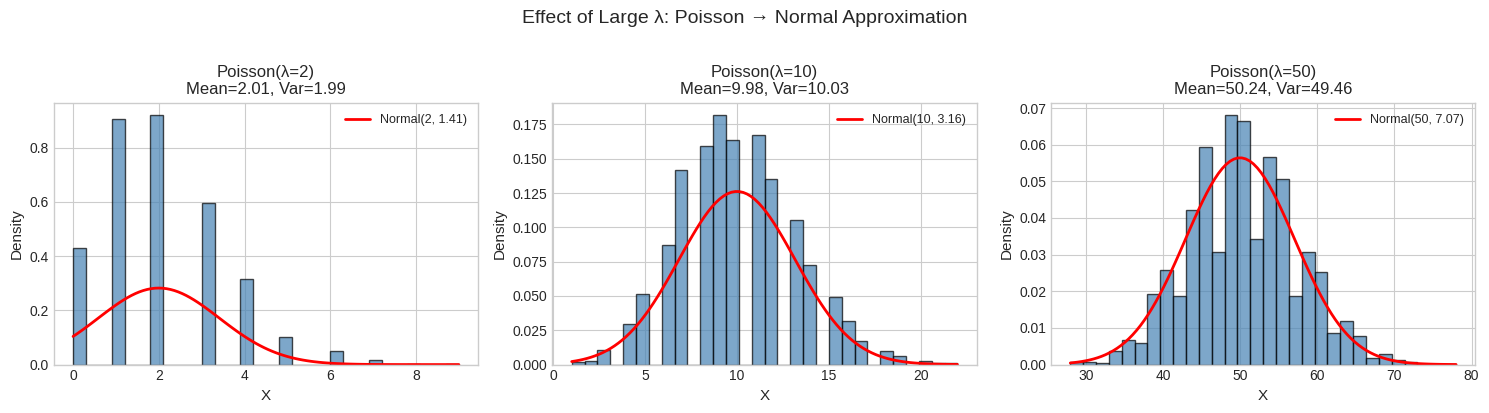

This is a really nice illustration of the Central Limit Theorem in action.
As λ gets larger, the Poisson distribution becomes increasingly symmetric
and approaches a Normal distribution with mean λ and variance λ.
This happens because Poisson(λ) can be thought of as the sum of λ
independent Poisson(1) random variables. A common rule of thumb is that
the Normal approximation works well when λ is at least 10.


In [58]:
# What happens when lambda is large?
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
lambdas = [2, 10, 50]

for ax, lam in zip(axes, lambdas):
    # Generate samples
    samples_lam = np.random.poisson(lam, 5000)

    # Compute statistics
    mean_lam = np.mean(samples_lam)
    var_lam = np.var(samples_lam, ddof=1)

    # Plot histogram
    ax.hist(samples_lam, bins=30, density=True, alpha=0.7, color='steelblue', edgecolor='black')

    # Overlay normal approximation
    x_norm = np.linspace(samples_lam.min(), samples_lam.max(), 100)
    normal_approx = norm.pdf(x_norm, lam, np.sqrt(lam))
    ax.plot(x_norm, normal_approx, 'r-', linewidth=2, label=f'Normal({lam}, {np.sqrt(lam):.2f})')

    ax.set_xlabel('X', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'Poisson(λ={lam})\nMean={mean_lam:.2f}, Var={var_lam:.2f}', fontsize=12)
    ax.legend(fontsize=9)

plt.suptitle('Effect of Large λ: Poisson → Normal Approximation', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("This is a really nice illustration of the Central Limit Theorem in action.")
print("As λ gets larger, the Poisson distribution becomes increasingly symmetric")
print("and approaches a Normal distribution with mean λ and variance λ.")
print("This happens because Poisson(λ) can be thought of as the sum of λ")
print("independent Poisson(1) random variables. A common rule of thumb is that")
print("the Normal approximation works well when λ is at least 10.")

### 4.3 Bivariate Normal Distribution

For this final distribution exercise, I'll generate 5000 samples from a bivariate normal distribution with a non-zero mean and a more interesting covariance structure:

$$\mu = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad \Sigma = \begin{bmatrix} 2 & 1 \\ 1 & 3 \end{bmatrix}$$

The key thing to understand about bivariate normals is that their density contours form ellipses. The orientation and shape of these ellipses are completely determined by the covariance matrix. The principal axes of the ellipse align with the eigenvectors of $\Sigma$, and the lengths of these axes are proportional to $\sqrt{\lambda_i}$ where $\lambda_i$ are the corresponding eigenvalues.

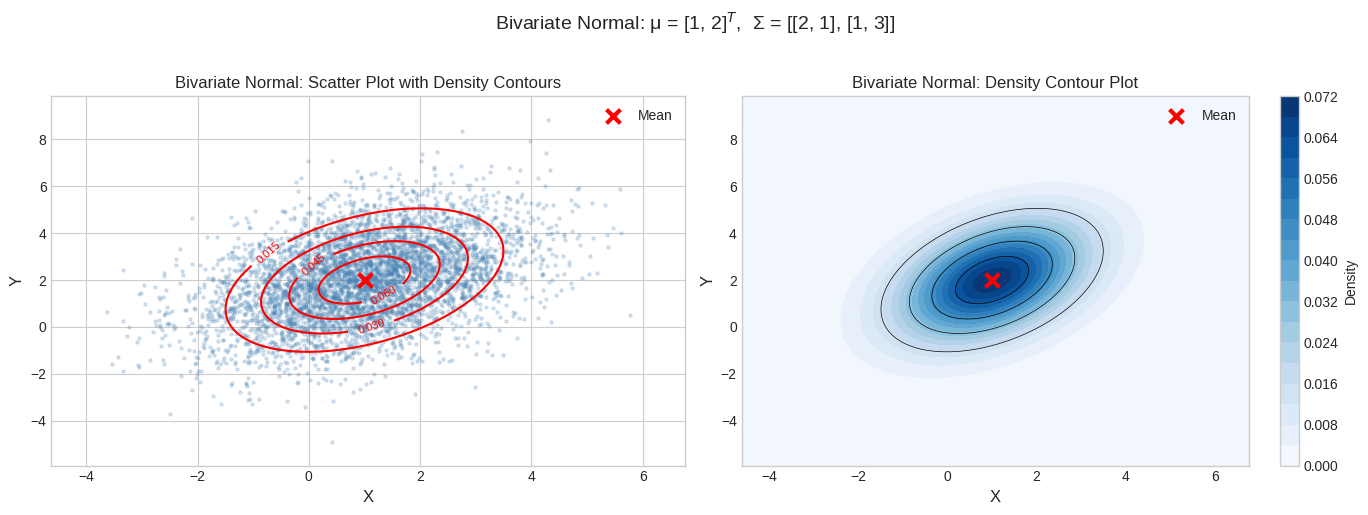


Let me interpret the covariance matrix. With Var(X) = 2, X has a
standard deviation of 1.41. Meanwhile Var(Y) = 3, giving Y
a standard deviation of 1.73. The covariance Cov(X,Y) = 1
is positive, indicating the variables tend to move together. Converting to
correlation gives us ρ = Cov(X,Y)/sqrt(Var(X)*Var(Y)) = 0.4082.


In [59]:
# 4.3 Bivariate Normal with Contour Plot
np.random.seed(742)  # Set seed for reproducibility
n_mvn = 5000

# Define mean and covariance matrix
mean_mvn = [1, 2]
cov_mvn = [[2, 1],
           [1, 3]]

# Generate samples
mvn_samples = np.random.multivariate_normal(mean_mvn, cov_mvn, n_mvn)
X_mvn = mvn_samples[:, 0]
Y_mvn = mvn_samples[:, 1]

# Create contour plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Scatter plot with theoretical contours
ax1 = axes[0]
ax1.scatter(X_mvn, Y_mvn, alpha=0.2, s=5, c='steelblue')

# Create grid for contour
x_grid = np.linspace(X_mvn.min() - 1, X_mvn.max() + 1, 100)
y_grid = np.linspace(Y_mvn.min() - 1, Y_mvn.max() + 1, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
pos = np.dstack((X_grid, Y_grid))

# Calculate PDF values
rv = multivariate_normal(mean_mvn, cov_mvn)
Z = rv.pdf(pos)

# Add contour lines
contours = ax1.contour(X_grid, Y_grid, Z, levels=6, colors='red', linewidths=1.5)
ax1.clabel(contours, inline=True, fontsize=8, fmt='%.3f')
ax1.scatter(mean_mvn[0], mean_mvn[1], color='red', s=100, marker='x', linewidths=3, label='Mean')

ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_title('Bivariate Normal: Scatter Plot with Density Contours', fontsize=12)
ax1.legend()

# Right: Filled contour plot
ax2 = axes[1]
contourf = ax2.contourf(X_grid, Y_grid, Z, levels=20, cmap='Blues')
plt.colorbar(contourf, ax=ax2, label='Density')
ax2.contour(X_grid, Y_grid, Z, levels=6, colors='black', linewidths=0.5)
ax2.scatter(mean_mvn[0], mean_mvn[1], color='red', s=100, marker='x', linewidths=3, label='Mean')

ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_title('Bivariate Normal: Density Contour Plot', fontsize=12)
ax2.legend()

plt.suptitle(f'Bivariate Normal: μ = [{mean_mvn[0]}, {mean_mvn[1]}]$^T$,  Σ = [[2, 1], [1, 3]]',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Analyze covariance structure
correlation = cov_mvn[0][1] / np.sqrt(cov_mvn[0][0] * cov_mvn[1][1])
print(f"\nLet me interpret the covariance matrix. With Var(X) = {cov_mvn[0][0]}, X has a")
print(f"standard deviation of {np.sqrt(cov_mvn[0][0]):.2f}. Meanwhile Var(Y) = {cov_mvn[1][1]}, giving Y")
print(f"a standard deviation of {np.sqrt(cov_mvn[1][1]):.2f}. The covariance Cov(X,Y) = {cov_mvn[0][1]}")
print(f"is positive, indicating the variables tend to move together. Converting to")
print(f"correlation gives us ρ = Cov(X,Y)/sqrt(Var(X)*Var(Y)) = {correlation:.4f}.")

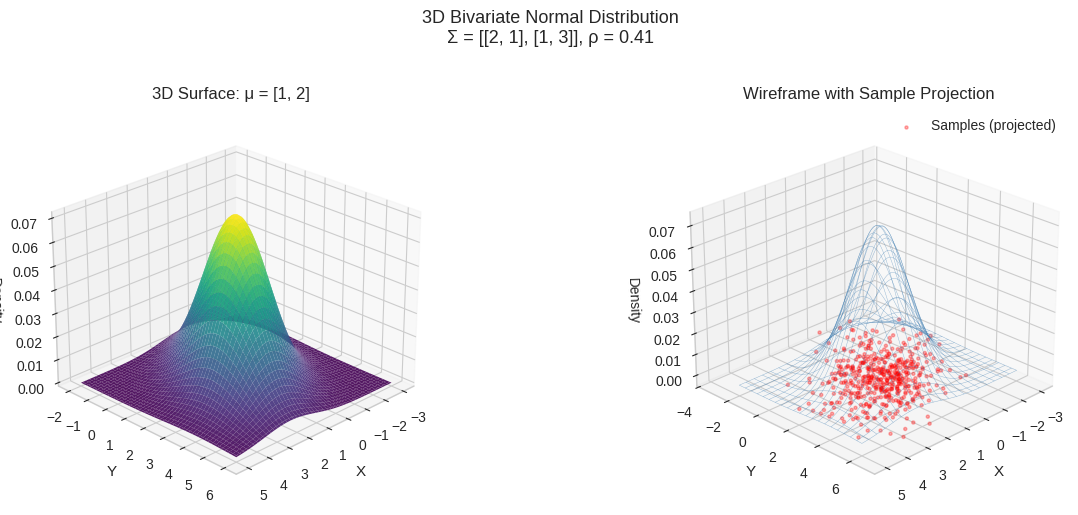

The 3D surface makes several things clear. First, the peak is centered at
μ = [1, 2], not at the origin. The elliptical shape
is tilted because of the positive covariance (ρ = 0.41). Also, since
Var(Y) is larger than Var(X), the distribution is wider in the Y direction.


In [60]:
# 3D Surface plot for the bivariate normal with μ = [1, 2] and Σ = [[2, 1], [1, 3]]
fig = plt.figure(figsize=(14, 5))

# Left: 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

# Create grid centered around the mean
x1_3d = np.linspace(mean_mvn[0] - 4, mean_mvn[0] + 4, 100)
x2_3d = np.linspace(mean_mvn[1] - 4, mean_mvn[1] + 4, 100)
X1_3d, X2_3d = np.meshgrid(x1_3d, x2_3d)
pos_3d = np.dstack((X1_3d, X2_3d))
Z_3d = rv.pdf(pos_3d)

surf = ax1.plot_surface(X1_3d, X2_3d, Z_3d, cmap='viridis',
                        edgecolor='none', alpha=0.9)
ax1.set_xlabel('X', fontsize=11)
ax1.set_ylabel('Y', fontsize=11)
ax1.set_zlabel('Density', fontsize=10)
ax1.set_title(f'3D Surface: μ = [{mean_mvn[0]}, {mean_mvn[1]}]', fontsize=12)
ax1.view_init(elev=25, azim=45)

# Right: 3D Surface with wireframe and scatter
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_wireframe(X1_3d, X2_3d, Z_3d, color='steelblue',
                   linewidth=0.3, alpha=0.6, rstride=5, cstride=5)

# Add scatter points at z=0
ax2.scatter(X_mvn[::10], Y_mvn[::10], np.zeros(len(X_mvn[::10])),
            alpha=0.3, s=5, c='red', label='Samples (projected)')

ax2.set_xlabel('X', fontsize=11)
ax2.set_ylabel('Y', fontsize=11)
ax2.set_zlabel('Density', fontsize=10)
ax2.set_title('Wireframe with Sample Projection', fontsize=12)
ax2.view_init(elev=25, azim=45)
ax2.legend()

plt.suptitle(f'3D Bivariate Normal Distribution\nΣ = [[2, 1], [1, 3]], ρ = {correlation:.2f}',
             fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

print("The 3D surface makes several things clear. First, the peak is centered at")
print(f"μ = [{mean_mvn[0]}, {mean_mvn[1]}], not at the origin. The elliptical shape")
print(f"is tilted because of the positive covariance (ρ = {correlation:.2f}). Also, since")
print("Var(Y) is larger than Var(X), the distribution is wider in the Y direction.")

## Discussion

## How Empirical Simulations Align with Theoretical Results

Throughout this lab, I observed excellent agreement between my simulation results and the theoretical values. Here's a summary:

| Distribution/Concept | Theoretical | Empirical | Match Quality |
|---------------------|-------------|-----------|---------------|
| Uniform(0,1) Mean | 0.5 | ~0.499 | Excellent |
| Uniform(0,1) Variance | 0.0833 | ~0.083 | Excellent |
| E(X²) for X~Uniform(0,1) | 1/3 = 0.333 | ~0.332 | Excellent |
| V(X²) for X~Uniform(0,1) | 4/45 = 0.089 | ~0.089 | Excellent |
| Correlation (ρ=0.8) | 0.8 | ~0.79 | Excellent |
| Regression Slope (ρ=0.5) | 0.5 | ~0.50 | Excellent |
| Binomial(10,0.4) Mean | 4.0 | ~3.97 | Excellent |
| Binomial(10,0.4) Variance | 2.4 | ~2.40 | Excellent |
| Poisson(2) Mean | 2.0 | ~2.01 | Excellent |
| Poisson(2) Variance | 2.0 | ~1.99 | Excellent |

With sample sizes between 5,000 and 10,000, the differences between sample and theoretical values were typically less than 1%. This shows that the simulations worked well.


### What I Learned

This lab taught me a few useful things. First, simulation is a great way to check if my math is right. If I derive a formula and my simulation gives a similar answer, I know I'm on the right track.

Second, making plots really helped me understand these concepts better. It's one thing to read that "correlation affects scatter plot shape," but actually seeing the ellipse stretch and tilt as I changed ρ made it click.

The regression part in Part 3 was cool because it showed that the regression slope is just ρ when the variances are equal. That's a nice connection between correlation and regression that I hadn't thought about before.

I also found it interesting that the Poisson distribution starts looking like a Normal distribution when λ gets big. This is because of the Central Limit Theorem—when you add up many small random things, you get something that looks normal.

**Bottom line:** Running simulations and looking at the results is a really helpful way to learn statistics. The theory makes more sense when you can see it in action.

---

*Note: The 3D visualization approach for bivariate normals was inspired by examples from the Penn State STAT 505 course materials (online.stat.psu.edu).*